# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_excel('/content/IGfollowers.xlsx')
df.head()


Saving IGfollowers.xlsx to IGfollowers (3).xlsx


,Name,Post/Share Frequently?,Active?,Replies to comments or messages?,# friends/followers,Personality
0,Moira,0,1,1,641,0
1,Luis,1,1,1,3953,1
2,Andrea,0,1,1,99,0
3,Raf,0,1,1,544,0
4,Jhona,1,1,1,1154,0


Display the summary of all the features of the dataset using `.info()`

In [ ]:
print("\nDataset information:")
print(df.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              100 non-null    object
 1   Post/Share Frequently?            100 non-null    int64 
 2   Active?                           100 non-null    int64 
 3   Replies to comments or messages?  100 non-null    int64 
 4   # friends/followers               100 non-null    int64 
 5   Personality                       100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB
None


Display the total number of samples from each label using `.value_counts()`

In [ ]:
print("\nPersonality distribution:")
print(df['Personality'].value_counts())


Personality distribution:
Personality
1    76
0    24
Name: count, dtype: int64


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

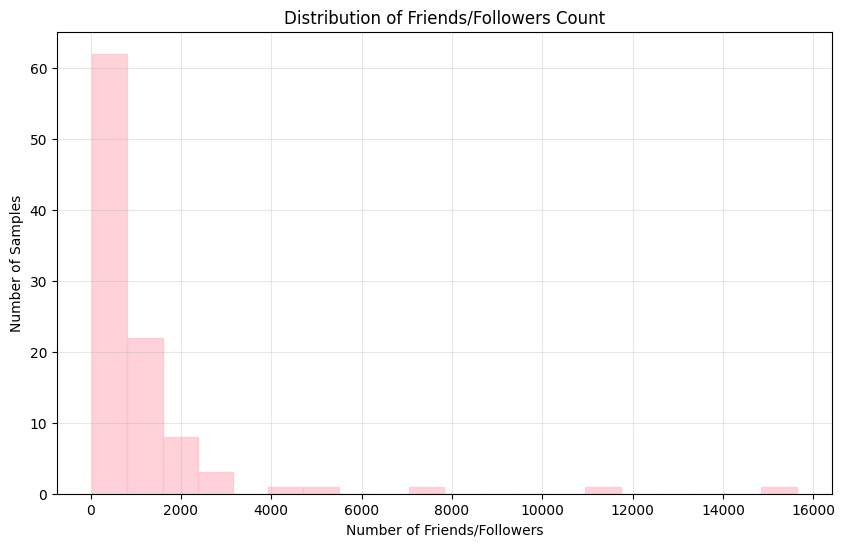

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['# friends/followers'], bins=20, alpha=0.7, color='pink', edgecolor='pink')
plt.xlabel('Number of Friends/Followers')
plt.ylabel('Number of Samples')
plt.title('Distribution of Friends/Followers Count')
plt.grid(True, alpha=0.3)
plt.show()

Remove the name column using `drop()` method

In [ ]:
if 'Name' in df.columns:
    df_clean = df.drop('Name', axis=1)
else:
    df_clean = df.copy()

print("\nDataset after removing Name column:")
print(df_clean.head())


Dataset after removing Name column:
   Post/Share Frequently?  Active?  Replies to comments or messages?  \
0                       0        1                                 1   
1                       1        1                                 1   
2                       0        1                                 1   
3                       0        1                                 1   
4                       1        1                                 1   

   # friends/followers  Personality  
0                  641            0  
1                 3953            1  
2                   99            0  
3                  544            0  
4                 1154            0  


## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [ ]:
X = df_clean.drop('Personality', axis=1).values
print(f"\nFeatures shape: {X.shape}")


Features shape: (100, 4)


Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [ ]:
y = df_clean['Personality'].values
print(f"Labels shape: {y.shape}")

Labels shape: (100,)


Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Display the dimensions of each variables using `.shape()`

In [ ]:
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (80, 4)
X_test shape: (20, 4)
y_train shape: (80,)
y_test shape: (20,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

Train the model using the `.fit()`

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Test the model using the `.predict()`

In [ ]:
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[ 0  5]
 [ 4 11]]


Display the accuracy

<Figure size 800x600 with 0 Axes>

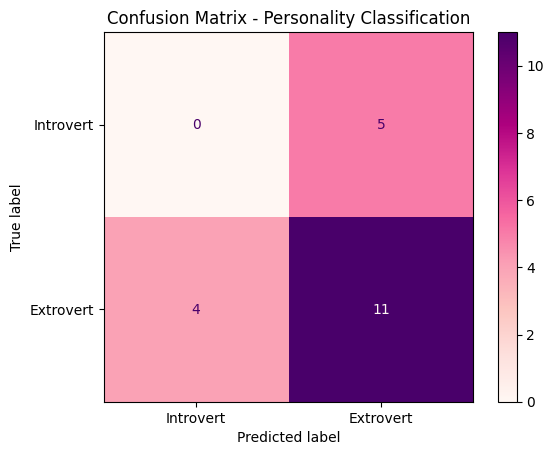

In [ ]:
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Introvert', 'Extrovert'])
disp.plot(cmap='RdPu')
plt.title('Confusion Matrix - Personality Classification')
plt.show()

Display the precision

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")


Accuracy: 0.5500 (55.00%)


Display the recall

In [ ]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.7333


Display the f1-score

In [ ]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.7097


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [ ]:
my_features_1 = [[0, 1, 1, 756]]
prediction_1 = knn.predict(my_features_1)
personality_1 = 'Extrovert' if prediction_1[0] == 1 else 'Introvert'
print(f"\nPrediction for Profile 1 (posts: 0, active: 1, replies: 1, followers: 756): {personality_1}")


Prediction for Profile 1 (posts: 0, active: 1, replies: 1, followers: 756): Extrovert
